# Decision Tree ( Classification Trees)

## Importing Library 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

## Importing Data

In [6]:
df=pd.read_csv('heart.csv')  # UCI Repositiory Downloaded heart disease dataset of cleveland
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# MISSING DATA PART 1: Identifying Missing Data  

In [7]:
# missing data -> blank space , nan,none

#### ways :
####   1. remove row 
####   2. replace by mean

In [8]:
print(df.dtypes) # data type of feature

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [9]:
# checking the null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### So the data set from the uci machine learning repo is cleaned 
### Note: The data doesn't contain any missing values so it can be used for classification

# Format Data Part 1: Split the Data into Dependent and Independent variables

In [12]:
# Independent Data
X=df.drop('target',axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
y=df['target'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Format Data Part 2: One-Hot encoding

In [14]:
X.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [15]:
X['cp'].unique()

array([3, 2, 1, 0])

In [18]:
pd.get_dummies(X,columns=['cp'],dtype=int).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_0,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0


In [21]:
X_encoded=pd.get_dummies(X,columns=['cp','restecg','slope','thal'],dtype=int)
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [22]:
# we also have y lets check for it
y.unique()

array([1, 0])

###### It is alredy in two category

#### We Finially finished the Formatting data 
## BAM!!!

# Build A Preliminary Classification Tree

In [23]:
# Split the data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)

# create a decision tree and fit the training data
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

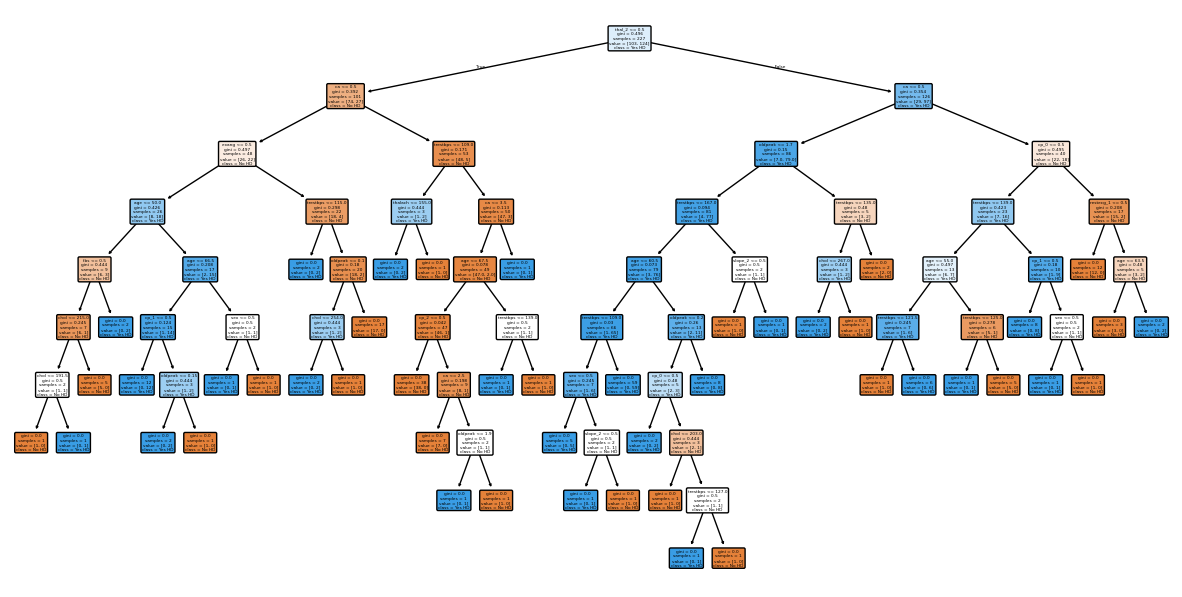

In [25]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,feature_names=X_encoded.columns,class_names=['No HD','Yes HD'],filled=True,rounded=True)
plt.show()

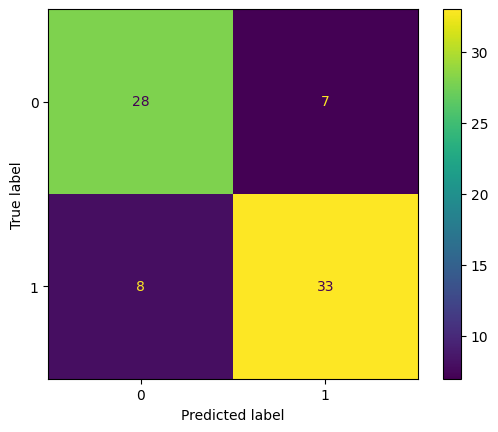

In [31]:
pred=clf_dt.predict(x_test)
cm=confusion_matrix(y_test,pred)
dis=ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot()

###### It is overfitting the training tree 

# Cost Complexity Pruning 1: Visualize Alpha 

pruning a decision is all about to find the value for alpha i.e pruning parameter , which contain how much pruning going to happen .
One way to find the optiomal value for alpha is to put the accuracy of the tree as the function of training and testing data 

In [33]:
path=clf_dt.cost_complexity_pruning_path(x_train,y_train) # determine the value for alpha
ccp_alphas=path.ccp_alphas # extract different values for alpha
ccp_alphas=ccp_alphas[:-1]

In [35]:
clf_dts=[] # create an array that will put decision tree into it
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train,y_train)
    clf_dts.append(clf_dt)

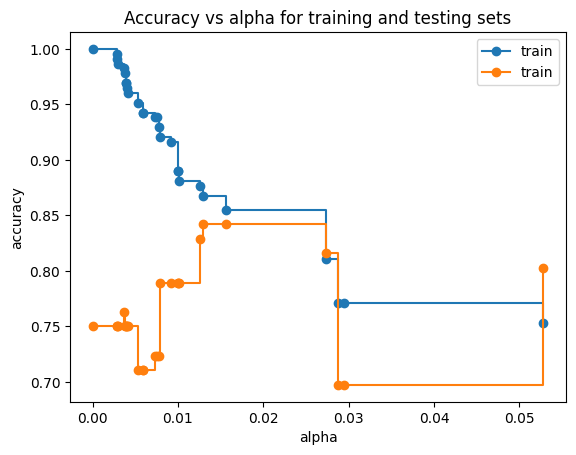

In [37]:
# now lets graph the accuracy of tree using training and testing datasets
train_score=[clf_dt.score(x_train,y_train) for clf_dt in clf_dts]
test_score=[clf_dt.score(x_test,y_test) for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas,train_score,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_score,marker='o',label='train',drawstyle='steps-post')
ax.legend()
plt.show()

### So looking at this data the good value for alpha is around 0.26

### Note: when we apply the cost complexity pruning for classification tree values for alpha go from 0 to 1 because Gini impurity value goes from 0 to 1 in contrast the the value of alpha for regression tree can be larger since the sum of squared residual goes from 0(zero) to (+)ive infinity

## Cost Complexity Pruning Part 2: Cross Validation For Finding The Best Value for Alpha

<Axes: xlabel='tree'>

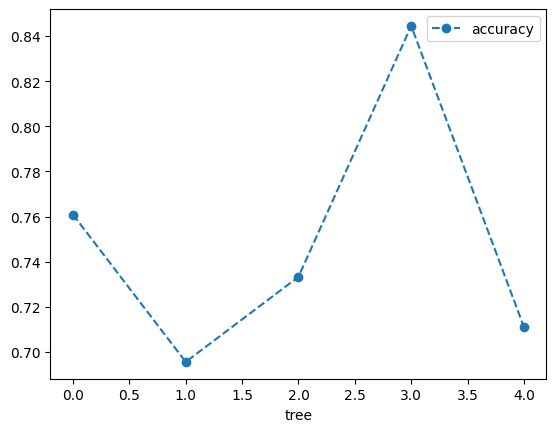

In [38]:
clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=0.026) # create a tree with alpha=0.026
scores=cross_val_score(clf_dt,x_train,y_train,cv=5)
df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [39]:
# Calculating the cross validation for each value of alpha
alpha_loop_values=[] # create an array that will put decision tree into it
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train,y_train)
    scores=cross_val_score(clf_dt,x_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

<Axes: xlabel='alpha'>

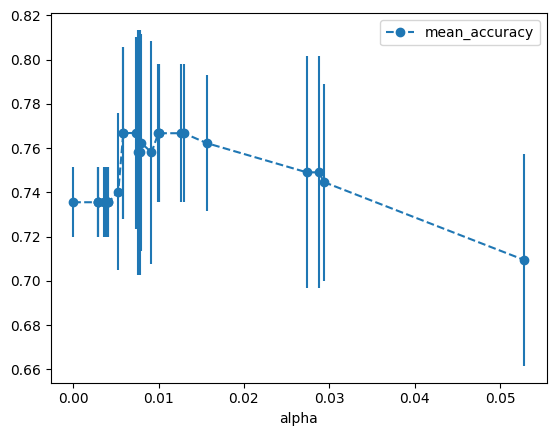

In [41]:
# now we can draw the graph
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

#### Instead of setting the value to 0.026 using crossvalidation the alpha should be 0.012

In [54]:
alpha_results[(alpha_results['alpha'] > 0.012) & (alpha_results['alpha'] < 0.0126)]


,alpha,mean_accuracy,std
21,0.012579,0.766763,0.031144


In [56]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha'] > 0.012) & (alpha_results['alpha'] < 0.0126)]['alpha']
ideal_ccp_alpha

21    0.012579
Name: alpha, dtype: float64

In [57]:
## converting the alpha to float
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

C:\Users\Rahul\AppData\Local\Temp\ipykernel_23792\843406419.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_ccp_alpha=float(ideal_ccp_alpha)


0.012579413412661354

# Building,Evaluting,Drawing,and Interpreting the Final Classification Tree

In [58]:
# Build and Train new deccision tree
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012579413412661354, random_state=42)

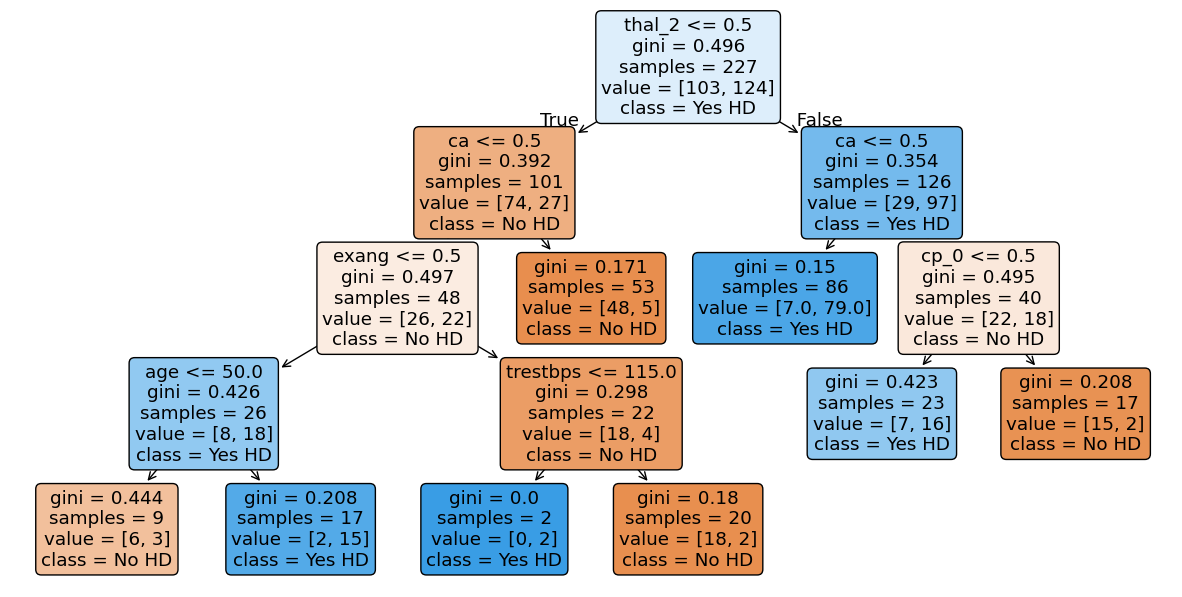

In [59]:
# drawing final decision tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,feature_names=X_encoded.columns,class_names=['No HD','Yes HD'])
plt.show()

# Triple Bam !!!!